<img src="img/decisionmaking.png" width="400">

# ELEC-E7851 - ELEC-E7890 - User Research
# Lecture 3 - Inference

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>
    <ul>
        <li> Understand what is a inferential test and a <i>p</i> value
        <li> Being able to assess the statistical significance of an experimental result
        <li> Differenciate what is a type-1 and type-2 error
        <li> Understand the condition of application of a test
        <li> Know what are the most classical tests and when to apply them
        <li> Being able to assess the external validy of a study
    </ul>
</div>

## Course Overview

<br>

<h3><a href="#S1"> 1. Inferential statistics: what for?</a></h3>

<h3><a href="#S2"> 2. The p-value as a probability to reject the null hypothesis by mistake</a></h3>

<h3><a href="#S3"> 3. The significance threshold(s)</a></h3>

<h3><a href="#S4"> 4. I got it wrong: Error type I and Error type II </a></h3>

<h3><a href="#S5"> 5. Case study: The Student's t-test</a></h3>

<a href="#S5.1"> 5.1 Compute the t statistic </a>

<a href="#S5.2"> 5.2 Compute the p-value </a>

<a href="#S5.3"> 5.3 One-sided vs two-sided </a>

<a href="#S5.4"> 5.4 The number of subjects matters</a>

<h3><a href="#S6"> 6. The condition of application of a stastical test: Which test can I use?</a></h3>

<a href="#S6.1"> 6.1 The number of subjects is not the same and/or variances are unequal: Welch's t-test</a>

<a href="#S6.2"> 6.2 The distribution is not (does not seem) normal: Rank dependant tests</a>

<a href="#S6.3">6.3 I have more than one factor: ANOVA</a>

<a href="#S6.4"> 6.4 I want to test the relation between two (continuous) variables: Regression Analysis</a>


<a href="#S6.5"> 6.5 I have only one group: Confidence Interval</a>

<h3><a href="#S7"> 7. External validity: The todo-NOT list</a></h3>

<a href="#Conclusive-Remarks-and-a-Few-Take-Aways">Conclusive Remarks and a Few Take Aways</a>

<a href="#Additional-material">Additional material</a>

# 1. Inferential statistics: What for?<a id="S1"></a>
<a href="#Course-Overview">Course Overview</a>

Let's start from where we stop last time...

---

Let's considerate data $D_N$ that follows a normal distribution, that is such that:
$$ D_N\sim \mathcal{N} (\mu ,\sigma )$$
the probability density function of the normal distribution being :
$$ {f(x)= \frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}} $$

In [106]:
# Import the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import string  # for adding letters in the figures
import scipy.special as sps  # For gamma function
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

np.set_printoptions(threshold=8)  # Don't print to much elements

In [107]:
# Define the parameters of my samples
mean_1 = 150.0
mean_2 = 200.0

small_sd = 10.0
large_sd = 50.0

n = 100

In [108]:
np.random.seed(4)  # Seed the random number generator for reproducibility

x1_small_sd = np.random.normal(mean_1, scale=small_sd, size=n)
x2_small_sd = np.random.normal(mean_2, scale=small_sd, size=n)

x1_large_sd = np.random.normal(mean_1, scale=large_sd, size=n)
x2_large_sd = np.random.normal(mean_2, scale=large_sd, size=n)

print("x1_small_std:", x1_small_sd)
print("x2_small_std:", x2_small_sd)
print("x1_large_std:", x1_large_sd)
print("x2_large_std:", x2_large_sd)

x1_small_std: [150.50561707 154.99951333 140.04091069 ... 148.2853539  140.55631401
 152.80864675]
x2_small_std: [207.38247111 206.50753231 206.1474063  ... 208.76742482 195.17121314
 190.14581539]
x1_large_std: [126.36685922 154.8133972  211.46066976 ... 181.62572316 194.21939087
 214.11836842]
x2_large_std: [259.72581298 175.06396376 195.96301932 ... 250.30749908 222.71614304
 179.27631164]


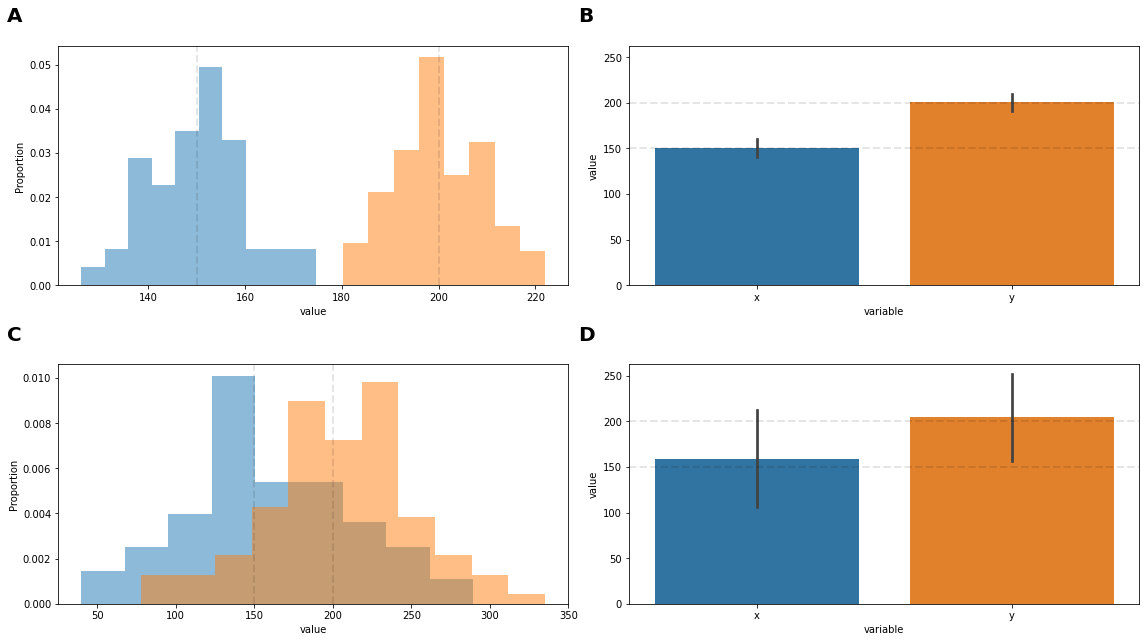

In [112]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

i = 0
for val1, val2 in ((x1_small_sd, x2_small_sd), (x1_large_sd, x2_large_sd)):

    ax = axes[i, 0]
    sns.histplot(val1, ax=ax, color="C0", kde=False, linewidth=0, alpha=0.5, stat="density")
    sns.histplot(val2, ax=ax, color="C1", kde=False, linewidth=0, alpha=0.5, stat="density")
    
    ax.axvline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axvline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

    
    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    ax = axes[i, 1]

    df = pd.DataFrame({"x": val1, "y": val2}).melt()

    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

    ax.set_ylim(0, max(mean_1, mean_2) + large_sd * 1.25)
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

    i += 1
    
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=20, weight='bold')

plt.tight_layout()
plt.show()

In [113]:
t, p = stats.ttest_ind(x1_large_sd, x2_large_sd)
print(f"t={t}, p={p}")

t=-6.2698379730170615, p=2.2209697178288552e-09


# 2. The p-value as a probability to reject the null hypothesis by mistake <a id="S2"></a>
<a href="#Course-Overview">Course Overview</a>

In [125]:
n = 100

mu1, mu2 = 100, 110
sigma1, sigma2 = 30, 60

np.random.seed(1234)
x1 = np.random.normal(mu1, scale=sigma1, size=n)
x2 = np.random.normal(mu2, scale=sigma2, size=n)

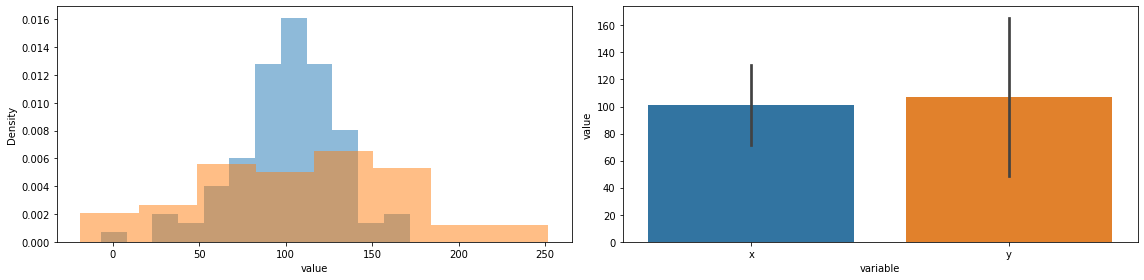

In [126]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

for (x, color) in ((x1, "C0"), (x2, "C1")):
    sns.histplot(x, ax=ax1, color=color, linewidth=0, alpha=0.5, stat="density")

ax1.set_ylabel("Density")
ax1.set_xlabel("value")

df = pd.DataFrame({"x": x1, "y": x2}).melt()

sns.barplot(x="variable", y="value", ax=ax2, data=df, ci="sd")

plt.tight_layout()
plt.show()

In [127]:
t, p = stats.ttest_ind(x1, x2, equal_var=False)
print(f"t = {t}, p = {p}")

t = -0.8967917151340026, p = 0.37129608235308287


In [128]:
m1 = np.mean(x1)
m2 = np.mean(x2)

sig1 = np.std(x1)  
sig2 = np.std(x2)

print("mean observed x1", m1)
print("mean observed x2", m2)
print("sd observed x1", sig1)
print("sd observed x2", sig2)

mean observed x1 101.05336849376309
mean observed x2 106.990752612104
sd observed x1 29.870545510062087
sd observed x2 58.71351368741412


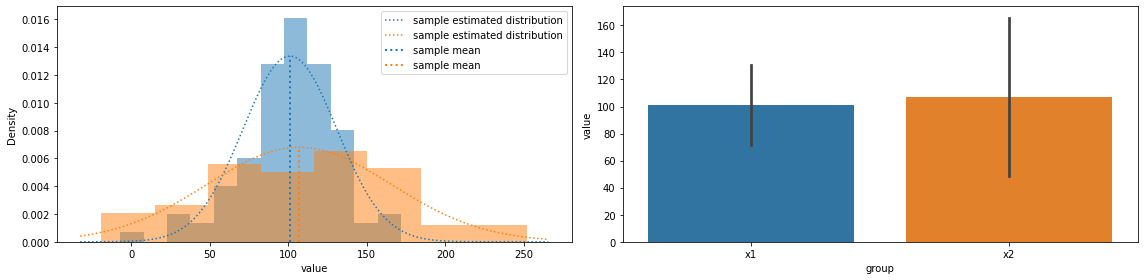

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

# Plot the histogram
for (x, color) in (x1, "C0"), (x2, "C1"):
    sns.histplot(x, ax=ax1, color=color, linewidth=0, alpha=0.5, stat="density")

# Plot the bell curves
x_min, x_max = ax1.get_xlim()

for m, sig, color in (m1, sig1, "C0"), (m2, sig2, "C1"):
    
    ymax = stats.distributions.norm.pdf(m, loc=m, scale=sig)
    ax1.vlines(m, ymin=0, ymax=ymax,transform=ax1.transData,
               label="sample mean", color=color, lw=2, ls=':')

    x_th = np.linspace(x_min, x_max, 1000)
    y_th = stats.distributions.norm.pdf(x_th, loc=m, scale=sig)
    
    ax1.plot(x_th, y_th, color=color, label="sample estimated distribution", ls=':')

ax1.set_ylabel("Density")
ax1.set_xlabel("value")
ax1.legend()

# Plot the barplot
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")

sns.barplot(x="group", y="value", ax=ax2, data=df, ci="sd")

plt.tight_layout()
plt.show()

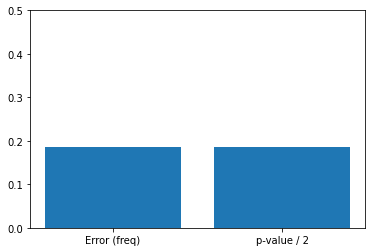

In [130]:
n_trials = 10000

mu1_sup_mu2 = np.zeros(n_trials)
for i in range(n_trials):
    x1 = np.random.normal(m1, scale=sig1, size=n)
    x2 = np.random.normal(m2, scale=sig2, size=n)
    mu1_sup_mu2[i] = np.mean(x1) > np.mean(x2)

err_freq = np.mean(mu1_sup_mu2)

fig, ax = plt.subplots()
labels = ['Error (freq)', "p-value / 2"]
values = [err_freq, p/2]
ax.bar(labels, values)
ax.set_ylim(0, 0.5)
plt.show()

# 3 The significance threshold(s)<a id="S3"></a>
<a href="#Course-Overview">Course Overview</a>

In human/animal related studies (but not only), $p=0.05$ (5% error)

<img src="img/p005.jpg" width="600">

# 4. I got it wrong: Error type I and Error type II <a id="S4"></a>
<a href="#Course-Overview">Course Overview</a>

 || Null hypothesis is true | null hypothesis is false |
|--- | --- | ----------- |
|**Reject null hypothesis**| False positive = Type I error | true negative |
|**Do not reject null hypothesis** | True positive | False negative = Type II error |

<img src="img/error.png" width="300">

## 4.1 Error type I: False positive <a id="S4.1">
<a href="#Course-Overview">Course Overview</a>

In [131]:
np.random.seed(46)

mu = 100
sig = 10

n = 20

x1 = np.random.normal(mu, scale=sig, size=n)
x2 = np.random.normal(mu, scale=sig, size=n)
print("x1", x1)
print("x2", x2)

x1 [105.8487584  112.3119574  108.21900264 ...  98.99906891 116.23757119
  86.63458352]
x2 [ 98.64867747  95.21659321  84.05024972 ...  96.40980352 104.54296187
  91.94502004]


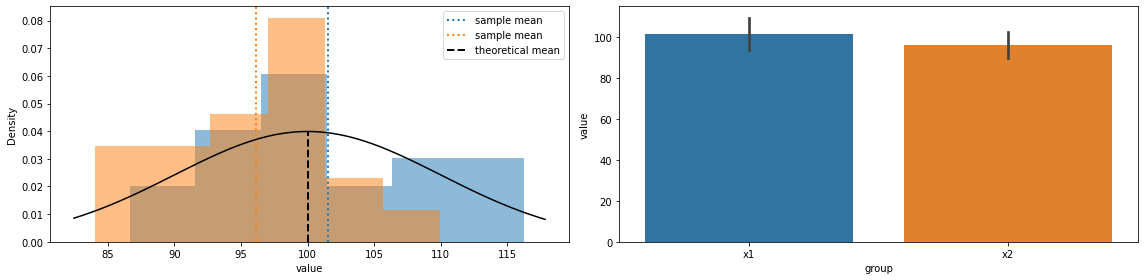

In [132]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

# Do the histogram
ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

ymax = stats.distributions.norm.pdf(mu, loc=mu, scale=sig)
ax.vlines(mu, ymin=0, ymax=ymax, 
          label="theoretical mean", color='black', lw=2, ls='--')

x_min, x_max= ax.get_xlim()
x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=mu, scale=sig)
ax.plot(x_th, y_th, color="black")


ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

# Do the barplot
ax = axes[1]
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")

plt.tight_layout()
plt.show()

In [133]:
thr = 0.05
t, p = stats.ttest_ind(x1, x2, equal_var=True)
print(f"t={t}, p={p}, can reject={p < thr}")

t=2.324641079949218, p=0.025533350157787085, can reject=True


## 4.2 Error type II: False negative <a id="S4.2">
<a href="#Course-Overview">Course Overview</a>

In [134]:
np.random.seed(0)

m1, m2 = 0, 1

sig = 0.9

n = 20

x1 = np.random.normal(m1, scale=sig, size=n)
x2 = np.random.normal(m2, scale=sig, size=n)

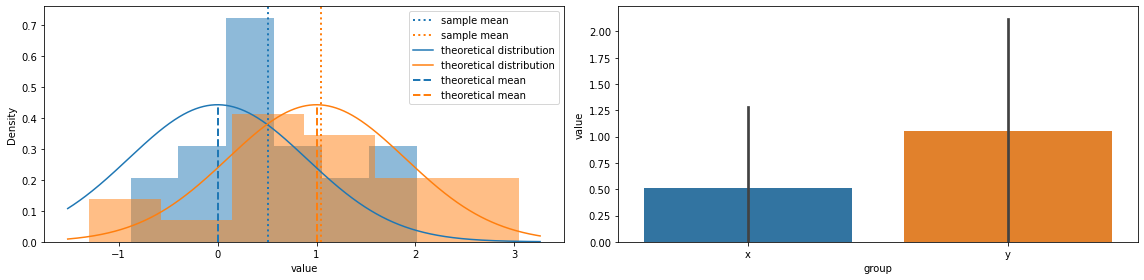

In [135]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]

# Plot the histogram
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

# Plot the sample means
ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

# Plot the bell curves
x_min, x_max= ax.get_xlim()

for m, color in (m1, "C0"), (m2, "C1"):
    
    ymax = stats.distributions.norm.pdf(m, loc=m, scale=sig)
    ax.vlines(m, ymin=0, ymax=ymax,transform=ax.transData,
               label="theoretical mean", color=color, lw=2, ls='--')

    x_th = np.linspace(x_min, x_max, 1000)
    y_th = stats.distributions.norm.pdf(x_th, loc=m, scale=sig)
    
    ax.plot(x_th, y_th, color=color, label="theoretical distribution", ls='-')

ax.set_ylabel("Density")
ax.set_xlabel("value")
ax.legend()

# Plot the barplot
ax = axes[1]

df = pd.DataFrame({"x": x1, "y": x2}).melt(var_name="group")

sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")
ax.set_ylim(0, ax.get_ylim()[-1])

plt.tight_layout()
plt.show()

In [136]:
thr = 0.05
t, p = stats.ttest_ind(x1, x2, equal_var=True)

print(f"t={t}, p={p}, can reject={p < thr}")

t=-1.7830545865581873, p=0.08256721720461004, can reject=False


# 5 Case study: The Student's t-test<a id="S5"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/William_Sealy_Gosset.jpg">
<center>William S. Gosset or "Student"</center>

## 5.1 Compute the t statistic <a id="S5.1"></a>
<a href="#Course-Overview">Course Overview</a>

The t statistic can be calculated as follows:

$$ t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}$$
where $n = n_1 = n_2$ and $s_p$ is the pooled standard deviation of the two samples. 

Note that:
* The numerator of $t$ is the difference between two means
* The denominator of $t$ is the standard error of the difference between the two means.

The pooled standard deviation of the two samples $X_1$ and $X_2$, noted $s_p$, is defined as:

$$ s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}} $$
with $s_{X_1}^2$ and $s_{X_2}^2$ are the unbiased estimators of the variances of $X_1$ and $X_2$.
 
The unbiased estimator of variance for a sample $X$ is defined as:

$${s_{X=[x_1, ..., x_n]}^{2}= {\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$

Original article: <a href="doi:10.1093/biomet/6.1.1">Student" William Sealy Gosset (1908). "The probable error of a mean" (PDF). Biometrika. 6 (1): 1–25</a>.

---

Let's take an example...

In [137]:
n=20

m1, m2 = 100, 115
sig = 30

np.random.seed(1234)
x1 = np.random.normal(m1, scale=sig, size=n)
x2 = np.random.normal(m2, scale=sig, size=n)
print("x1", x1)
print("x2", x2)

x1 [114.14305491  64.27072916 142.98120905 ... 108.67275823 139.63474576
  53.5928334 ]
x2 [108.92061026  95.32091968 120.80264129 ... 105.31615583 140.25024139
 186.72881546]


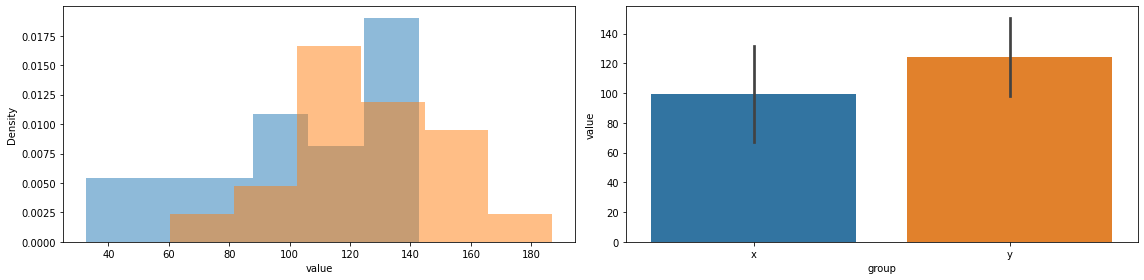

In [138]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

for (x, color) in (x1, "C0"), (x2, "C1"):
    sns.histplot(x, ax=ax1, color=color, linewidth=0, alpha=0.5, stat="density")

ax1.set_ylabel("Density")
ax1.set_xlabel("value")

df = pd.DataFrame({"x": x1, "y": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax2, data=df, ci="sd")

plt.tight_layout()
plt.show()

[...] 

with $s_{X_1}^2$ and $s_{X_2}^2$ are the unbiased estimators of the variances of $X_1$ and $X_2$.
 
The unbiased estimator of variance for a sample $X$ is defined as:

$${s_{X=[x_1, ..., x_n]}^{2}= {\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$
[...]

In [139]:
var1 = np.var(x1, ddof=1)
var2 = np.var(x2, ddof=1)
print("var1", var1)
print("var2", var2)

var1 1092.6737289949485
var2 733.3891932316409


[...] 

The pooled standard deviation of the two samples $X_1$ and $X_2$, noted $s_p$, is defined as:

$${\displaystyle s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}.}$$
[...]

In [140]:
sp = np.sqrt((var1 + var2)/2)
print("sp", sp)

sp 30.216410460431838


The t statistic can be calculated as follows:

$$ t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}$$
[...]

In [141]:
denom = sp * np.sqrt(2 / n)
print("denominator", denom)

denominator 9.555267976950173


In [142]:
mean1 = np.mean(x1)
mean2 = np.mean(x2)

num = mean1 - mean2
print("numerator", num)

numerator -24.76007493091535


In [143]:
t = num/denom
print("t", t)

t -2.5912486170605766


In [144]:
t, p = stats.ttest_ind(x1, x2, equal_var=True)
print("t", t, "p", p)

t -2.591248617060576 p 0.013492277877684325


## 5.2 Compute the p-value <a id="S5.2"></a>
<a href="#Course-Overview">Course Overview</a>

Student's t-distribution has the <b>probability density function</b> given by:
$$f(x) = \frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}$$
where $\nu$  is the number of degrees of freedom $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

For significance testing, the degrees of freedom for this test is $2n − 2$ where n is the number of participants in each group.

In [145]:
df = 2*n - 2
print("degrees of freedom:", df)

degrees of freedom: 38


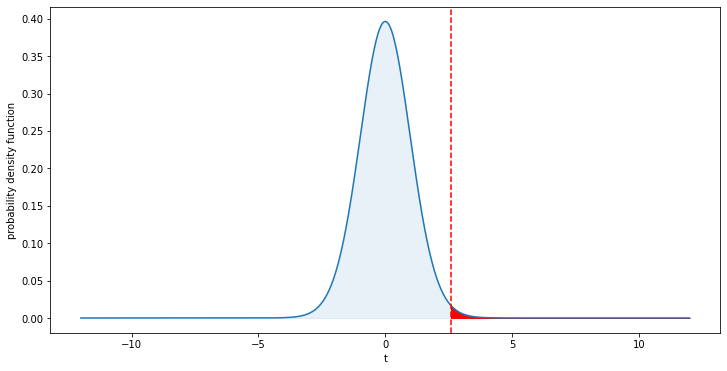

In [146]:
g = sps.gamma

abs_t = np.abs(t)

x = np.linspace(-12, 12, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)

x_blue = np.linspace(-12, abs_t, 1000)
y_blue = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x_blue**2/df) ** (-(df+1)/2)

x_red = np.linspace(abs_t, 12, 1000)
y_red = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x_red**2/df) ** (-(df+1)/2)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y)

ax.fill_between(x_blue, 0, y_blue, color="C0", alpha=0.1)

ax.fill_between(x_red, 0, y_red, color="red")
ax.axvline(abs_t, ls='--', color="red")

ax.set_xlabel("t")
ax.set_ylabel("probability density function")

plt.show()

---

The <b>cumulative density function</b> is given by:
$$
     F(x) = \frac{1}{2} + x \Gamma \left( \frac{\nu+1}{2} \right)  \times
     \frac{\,_2F_1 \left ( \frac{1}{2},\frac{\nu+1}{2};\frac{3}{2};
           -\frac{x^2}{\nu} \right)}
     {\sqrt{\pi\nu}\,\Gamma \left(\frac{\nu}{2}\right)}$$
where $_2F_1$ is the hypergeometric function

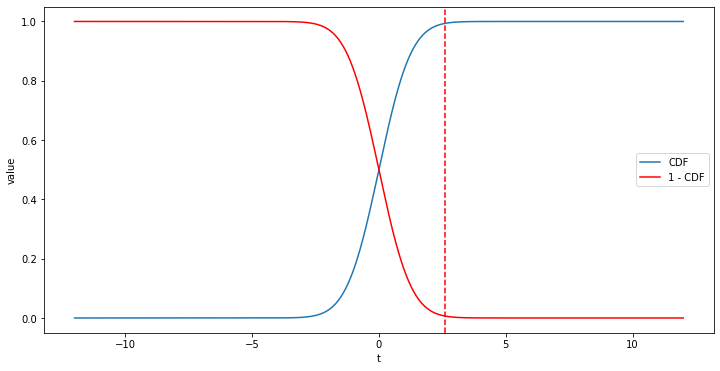

In [147]:
x = np.linspace(-12, 12, 1000)

fig, ax = plt.subplots(figsize=(12, 6))

y1 = stats.distributions.t.cdf(x, df)
ax.plot(x, y1, label="CDF", color="C0")
ax.set_xlabel("t")
ax.set_ylabel("value")

ax.plot(x, 1 - y1, label="1 - CDF", color="red")
ax.set_xlabel("t")

ax.axvline(abs_t, ls='--', color="red")

ax.legend()
plt.show()

In [148]:
p = (1 - stats.distributions.t.cdf(abs_t, df)) * 2
print("p", p)

p 0.013492277877684256


In [149]:
t, p = stats.ttest_ind(x1, x2)
print("t", t, "p", p)

t -2.591248617060576 p 0.013492277877684325


---

Note: For further explanation, you can refer to: <a href="https://doi.org/10.1038/nmeth.2698">Krzywinski, M., Altman, N. Significance, P values and t-tests. Nat Methods 10, 1041–1042 (2013).</a>

## 5.3 One-sided vs two-sided<a id="S5.3"></a>
<a href="#Course-Overview">Course Overview</a>

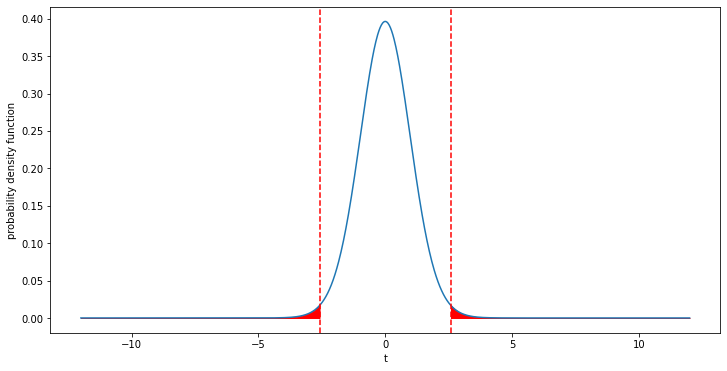

In [150]:
g = sps.gamma

min_x, max_x = -12, 12

x = np.linspace(min_x, max_x, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_xlabel("t")
ax.set_ylabel("probability density function")

t_value = 1.2

for t_ in (abs_t, -abs_t):
    if t_ > 0:
        x = np.linspace(t_, max_x, 1000)
    else:
        x = np.linspace(min_x, t_, 1000)
    y_f = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)
    ax.fill_between(x, 0, y_f, color="red")
    ax.axvline(t_, ls='--', color="red")
plt.show()

**Note: Two sided is more conservative than one sided**

## 5.4 The number of subjects matters<a id="S5.4"></a>
<a href="#Course-Overview">Course Overview</a>

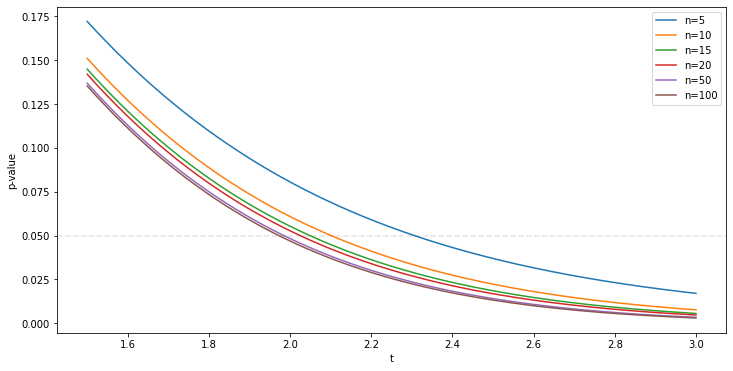

In [151]:
x = np.linspace(1.5, 3, 1000)
ns = [5, 10, 15, 20, 50, 100]

fig, ax = plt.subplots(figsize=(12, 6))

for n in ns:
    df = 2*n - 2
    y = (1 - stats.distributions.t.cdf(x, df)) * 2

    ax.plot(x, y, label=f"n={n}")
    
ax.set_xlabel("t")
ax.set_ylabel("p-value")

ax.axhline(0.05, ls='--', color="black", alpha=0.1)
ax.legend()

plt.show()

The more you will increase your $n$, the more you will increase the probability to have significant results

# 6. The condition of application of a stastical test: Which test can I use?<a id="S6"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/doc_t_test.png" width="600">

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

Apply a Student t-test only if:
* samples have equal size
* distributions are normally distributed
* variance of each sample is the same

## 6.1 The number of subjects is not the same and/or variances are unequal: Welch's t-test<a id="S6.1"></a>
<a href="#Course-Overview">Course Overview</a>

...but the <b>distribution</b> is still (expected to be) <b>normal</b>

In [152]:
np.random.seed(4)

m1, m2 = 100, 150
sd1, sd2 = 50, 10

n = 100

x1 = np.random.normal(m1, scale=sd1, size=n)
x2 = np.random.normal(m2, scale=sd2, size=n)
print("x1", x1)
print("x2", x2)

x1 [102.52808536 124.99756666  50.20455344 ...  91.42676952  52.78157003
 114.04323377]
x2 [157.38247111 156.50753231 156.1474063  ... 158.76742482 145.17121314
 140.14581539]


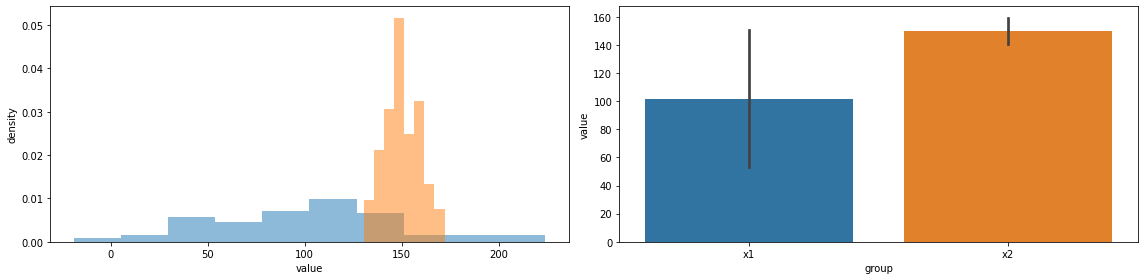

In [153]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

# Plot the histogram
ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

ax.set_ylabel("density")
ax.set_xlabel("value")

# Plot the barplot
ax = axes[1]
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")

plt.tight_layout()
plt.show()

The Welch's t-test can be computed this way:

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{\bar {\Delta }}}}}$$
where

$${\displaystyle s_{\bar {\Delta }}={\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}.}$$

In [154]:
# Note that the 'equal-var=False' that will force the use of a Welch's t-test 
# (instead of a Student t-test)
t, p = stats.ttest_ind(x1, x2, equal_var=False)
print(f"t={t}, p={p}")

t=-9.732916761113751, p=2.1823383644149874e-16


## 6.2 The distribution is not (does not seem) normal: Rank dependant tests<a id="S6.2"></a>
<a href="#Course-Overview">Course Overview</a>

...also called '<b>non-parametric</b>' tests.

Let's take an example...

---

Let's now consider data following a Gamma distribution, that is such that:
$$ D_G \sim \mathrm{Gamma} (\alpha ,\beta )$$
the probability density function of the Gamma distribution being :
$${\begin{aligned}f(x;\alpha ,\beta )&={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}}\quad {\text{ for }}x>0\quad \alpha ,\beta >0,\\[6pt]\end{aligned}}$$
where $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

In [155]:
# From the doc: Samples are drawn from a Gamma distribution with specified parameters, 
# shape (sometimes designated “k”) and scale (sometimes designated “theta”), 
# where both parameters are > 0.
# knowing that theta = 1/beta
np.random.seed(124)
k1, t1 = 1, 10
k2, t2 = 1.3, 14
x1 = np.random.gamma(k1, scale=t1, size=25)
x2 = np.random.gamma(k2, scale=t2, size=25)
print("x1", x1)
print("x2", x2)

x1 [ 1.12122108 13.68342406  8.49364914 ...  8.10844989  5.19171155
  1.52866687]
x2 [29.33705625 10.55513547  9.03522155 ... 30.88223766 70.36511674
 13.5331025 ]


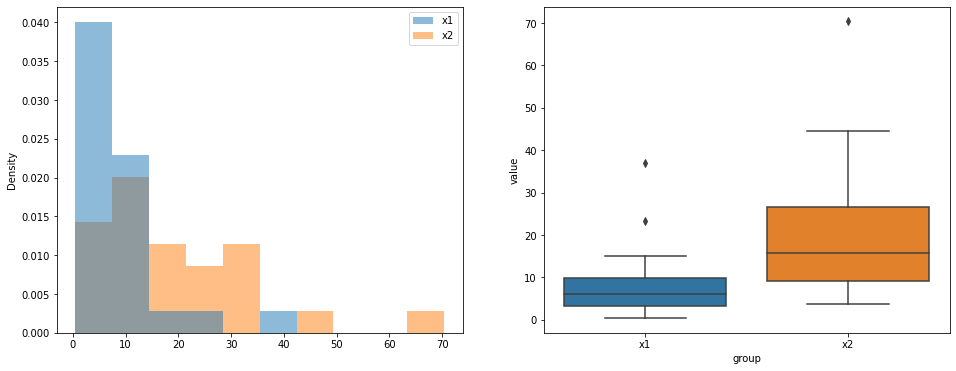

In [156]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

sns.histplot(ax=ax1, data=pd.DataFrame({"x1": x1, "x2": x2}),
             stat="density",  linewidth=0, alpha=0.5)

df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.boxplot(x="group", y="value", ax=ax2, data=df)

plt.show()

### 6.2.1 Compute a Mann–Whitney U <a id="S6.2.1"></a>
<a href="#Course-Overview">Course Overview</a>

Original article: <a href="doi:10.1214/aoms/1177730491">Mann, Henry B.; Whitney, Donald R. (1947). "On a Test of Whether one of Two Random Variables is Stochastically Larger than the Other". Annals of Mathematical Statistics. 18 (1): 50–60.</a> 

In [157]:
u, p = stats.mannwhitneyu(x1, x2)
print(f"u = {u}, p={p}")

u = 131.0, p=0.00022244442020446291


---

How does it work?

1. Assign numeric ranks to all the observations (put the observations from both groups to one set), beginning with 1 for the smallest value. Where there are groups of tied values, assign a rank equal to the midpoint of unadjusted rankings. 

Ex: the ranks of (3, 5, 5, 5, 5, 8) are (1, 3.5, 3.5, 3.5, 3.5, 6) <i>[note the unadjusted rank would be (1, 2, 3, 4, 5, 6))]</i>.


In [159]:
n1 = len(x1)
n2 = len(x2)
ranked = stats.rankdata(np.concatenate((x1, x2)))
print("ranked value", ranked)

ranked value [ 2. 32. 22. ... 45. 50. 31.]


2. add up the ranks for the observations which came from sample 1. The sum of ranks in sample 2 is now determinate, since the sum of all the ranks equals $N(N + 1)/2$ where $N$ is the total number of observations.

$U$ is then given by:

$$U_{1}=R_{1}-{n_{1}(n_{1}+1) \over 2}\,\!$$
where n1 is the sample size for sample 1, and R1 is the sum of the ranks in sample 1.

$$U_{2}=R_{2}-{n_{2}(n_{2}+1) \over 2}\,\!$$

In [160]:
rank_x = ranked[0:n1]  # get the x-ranks
u1 = n1 * n2 + (n1 * (n1 + 1)) / 2.0 - np.sum(rank_x, axis=0)  # calc U for x1
u2 = n1 * n2 - u1  # remainder is U for x2
print(f"u1 = {u1}; u2 = {u2}")

u1 = 494.0; u2 = 131.0


In [161]:
u, p = stats.mannwhitneyu(x1, x2)
print(f"u = {u}, p={p}")

u = 131.0, p=0.00022244442020446291


### 6.2.2 Compute the p-value of a Mann-Whitney U<a id="S6.2.2"></a>
<a href="#Course-Overview">Course Overview</a>

For large samples (n>20), U is approximately normally distributed, with 

$$\mu = \frac {n_{1}n_{2}}{2}$$

$$\sigma^2 = \sqrt {n_1 n_2 (n_1+n_2+1) \over 12}$$
if there is a tie, a correction is necessary:

$$\sigma^2_{\text{corr}}={\sqrt {{n_{1}n_{2} \over 12}\left((n+1)-\sum _{i=1}^{k}{{t_{i}}^{3}-t_{i} \over n(n-1)}\right)}}\,$$

where $n = n_1 + n_2$, $t_i$ is the number of subjects sharing rank $i$, and $k$ is the number of (distinct) ranks.

In [162]:
mean_rank = n1*n2/2.0
print("mean_rank", mean_rank)

mean_rank 312.5


In [163]:
sd = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0) # We assume that there is not tie here
print("sd", sd)

sd 51.53882032022076


In [164]:
u = max(u1, u2)
p = (1 - stats.norm.cdf(u, loc=mean_rank, scale=sd)) * 2
print("p", p)

p 0.0004289228995439931


In [165]:
# Alternative: compute Z-score first
z = (u - mean_rank) / sd
p = (1 - stats.norm.cdf(z)) * 2
print("p", p)

p 0.0004289228995439931


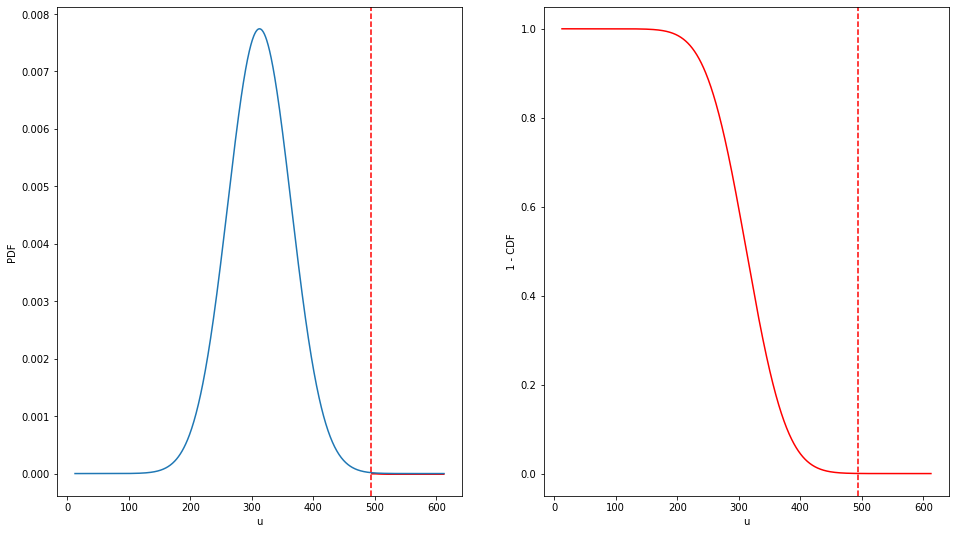

In [166]:
x_min, x_max = mean_rank-300, mean_rank+300
mu, sigma = mean_rank, sd
x = np.linspace(x_min, x_max, 1000)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

x_f = np.linspace(u, x_max)
y_f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x_f - mu)**2 / (2 * sigma**2) )

y2 = (1 - stats.norm.cdf(x, loc=mu, scale=sigma))

fig, axes = plt.subplots(ncols=2, figsize=(16, 9))

ax1, ax2 = axes

ax1.plot(x, y)
ax1.fill_between(x_f, 0, y_f, color="red")
ax1.axvline(u, ls='--', color="red")
ax1.set_xlabel("u")
ax1.set_ylabel("PDF")

ax2.plot(x, y2, color="red")
ax2.axvline(u, ls='--', color="red")
ax2.set_xlabel("u")
ax2.set_ylabel("1 - CDF")

plt.show()

<img src="img/doc_mw.png" width="600">

## 6.3 I have more than one factor: ANOVA<a id="S6.3"></a>
<a href="#Course-Overview">Course Overview</a>

or <b>ANalysis Of VAriance</b> is probably what you're looking for...

Let's take an example...

---

In [167]:
df = pd.read_csv("data/stcp-Rdataset-Diet.csv")
print(df.head())

   Person gender  Age  Height  pre.weight  Diet  weight6weeks
0      25          41     171          60     2          60.0
1      26          32     174         103     2         103.0
2       1      0   22     159          58     1          54.2
3       2      0   46     192          60     1          54.0
4       3      0   55     170          64     1          63.3


In [168]:
print(df.count())

Person          78
gender          78
Age             78
Height          78
pre.weight      78
Diet            78
weight6weeks    78
dtype: int64


In [169]:
df["Loss"] = df["pre.weight"] - df["weight6weeks"]
print(df.head())

   Person gender  Age  Height  pre.weight  Diet  weight6weeks  Loss
0      25          41     171          60     2          60.0   0.0
1      26          32     174         103     2         103.0   0.0
2       1      0   22     159          58     1          54.2   3.8
3       2      0   46     192          60     1          54.0   6.0
4       3      0   55     170          64     1          63.3   0.7


In [170]:
print(df["gender"].unique())

[' ' '0' '1']


In [171]:
df = df[df["gender"] != ' ']
print(df.count())

Person          76
gender          76
Age             76
Height          76
pre.weight      76
Diet            76
weight6weeks    76
Loss            76
dtype: int64


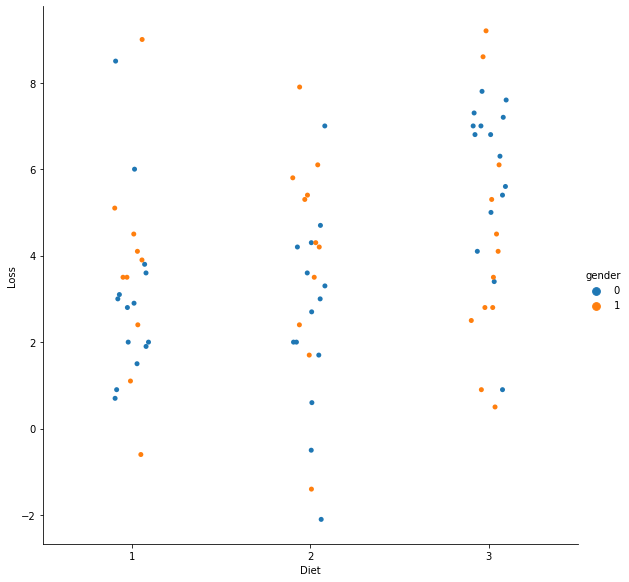

In [172]:
g = sns.catplot(x="Diet", y="Loss", hue="gender",
                data=df, height=8)
plt.show()

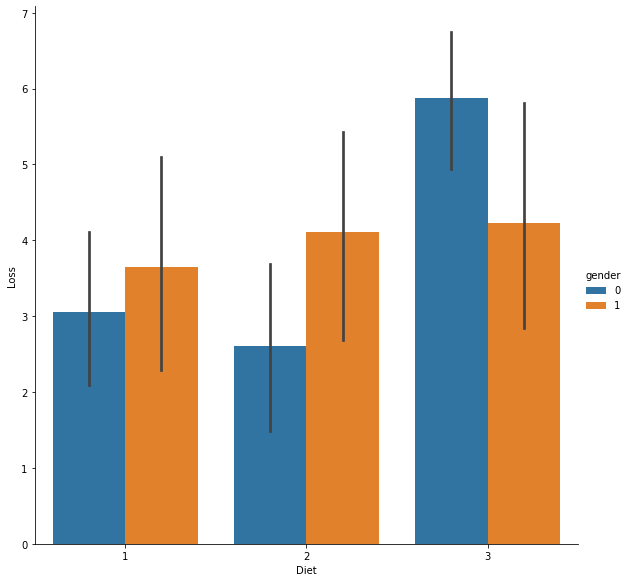

In [173]:
g = sns.catplot(x="Diet", y="Loss", hue="gender",
               data=df, kind="bar", height=8)
plt.show()

In [174]:
formula = 'Loss ~ C(Diet) * C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(Diet)             60.417220   2.0  5.619026  0.005456
C(gender)            0.168696   1.0  0.031379  0.859910
C(Diet):C(gender)   33.904068   2.0  3.153204  0.048842
Residual           376.329043  70.0       NaN       NaN


Data from <a href="https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv">https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv</a>

## 6.4 I want to test the relation between two (continuous) variables: Regression Analysis<a id="S6.4"></a>
<a href="#Course-Overview">Course Overview</a>

...is probably what you're looking for.

Let's see an example...

---

In [175]:
df = pd.read_csv(os.path.join("data", "rr.csv"))
print(df.head())

     Country  Year        Debt    Growth
0  Australia  1946  190.419080 -3.557951
1  Australia  1947  177.321371  2.459475
2  Australia  1948  148.929811  6.437534
3  Australia  1949  125.828699  6.611994
4  Australia  1950  109.809398  6.920201


Data from <a href="https://pubs.aeaweb.org/doi/pdf/10.1257/aer.100.2.573">Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American economic review, 100(2), 573-78.</a>

<AxesSubplot:xlabel='Debt', ylabel='Growth'>

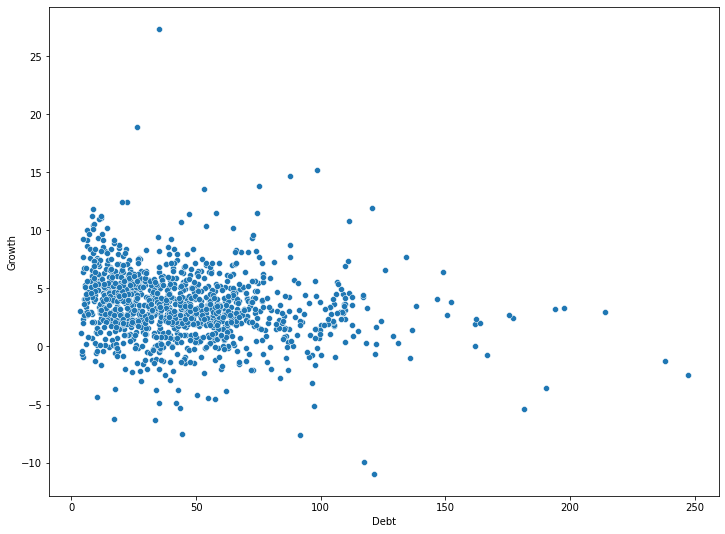

In [176]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x="Debt", y="Growth", ax=ax, data=df)

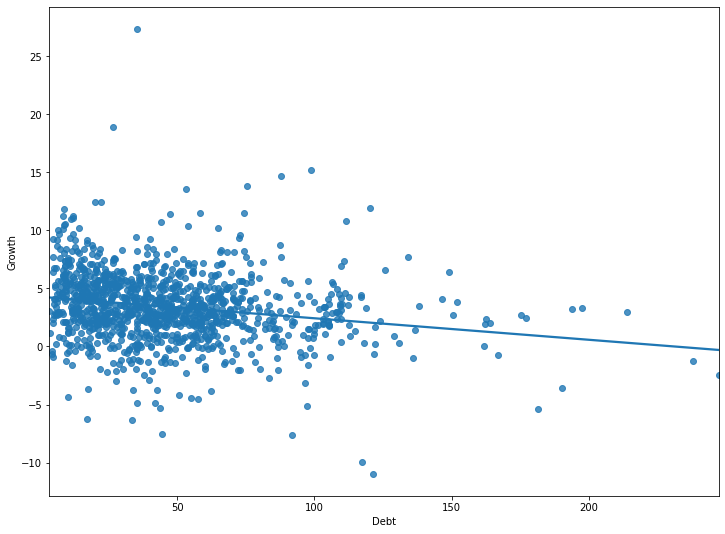

In [177]:
fig, ax =plt.subplots(figsize=(12, 9))
sns.regplot(x="Debt", y="Growth", data=df, ax=ax, ci=None)
plt.show()


### 6.4.1 Compute a Pearson correlation coefficient <a id="S6.4.1"></a>
<a href="#Course-Overview">Course Overview</a>

$$r_{xy}= \frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}$$

where $\overline {x}$ and $\overline {y}$ are the sample means of $X$ and $Y$, and $s_{x}$ and $s_{y}$ are the corrected sample standard deviations of $X$ and $Y$.

Original article Pearson, Karl (1895). "Notes on regression and inheritance in the case of two parents". Proceedings of the Royal Society of London. 58: 240–242.

In [178]:
x, y = df["Debt"], df["Growth"]

r_num = np.sum((x - np.mean(x)) * (y - np.mean(y)))
r_denom = np.sqrt(np.sum((x - np.mean(x))**2))*np.sqrt(np.sum((y - np.mean(y))**2))
r = r_num/r_denom
print("r", r)

r -0.19986576578883178


---

Inference a Student's t-distribution:
$$t=r{\sqrt {\frac {\nu}{1-r^{2}}}}$$
with $\nu = n-2$ the number of degrees of freedom

In [179]:
n = len(x)
dof = n - 2
t = r * np.sqrt(dof/(1 - r**2))
p = 2 * (1 - stats.distributions.t.cdf(np.abs(t), dof))
print("p", p)

p 4.723998969780041e-12


In [180]:
r_, p = stats.pearsonr(x, y)
print(f"r={r_}, p={p}")

r=-0.19986576578883178, p=4.723997934448434e-12


### 6.4.2 Compute a linear regression<a id="S6.4.2"></a>
<a href="#Course-Overview">Course Overview</a>

$$y = \alpha + \beta x$$ 
which means in this case:
$$\text{Growth} = \alpha + \beta \text{Debt}$$


with:
$$ \alpha ={\bar {y}}-{\beta }\,{\bar {x}}$$

$$ \beta ={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}$$

In [181]:
beta = r_num / np.sum((x - np.mean(x))**2)
alpha = np.mean(y) - beta*np.mean(x)
print(f"alpha={alpha} beta={beta}")

alpha=4.270368134671323 beta=-0.018493267021115034


In [186]:
# For having the parameters of the regression line
res = stats.linregress(df["Debt"], df["Growth"])
alpha = res.intercept
beta = res.slope
print(f"alpha={alpha} beta={beta}")

alpha=4.270368134671323 beta=-0.018493267021115038


---

Don't forget to read the doc for knowing of the conditions of application!

<img src="img/doc_cor.png" width="500">
<img src="img/doc_cor2.png" width="500">

## 6.5 I have only one group: Confidence Interval<a id="S6.5"></a>
<a href="#Course-Overview">Course Overview</a>

...is probably what you're looking for.

$$ \Pr(-c\leq \bar X \leq c)= 1-\alpha $$


Let's take an example...

---

In [63]:
df = pd.read_csv("data/flights.csv")
print(df.head())

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T05:00:00Z  
1      141

Data from <a href="https://data.world/bob-wakefield/flights">https://data.world/bob-wakefield/flights</a>

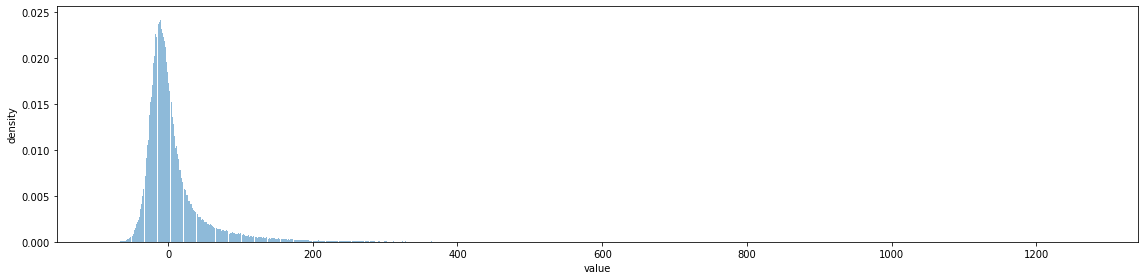

In [64]:
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x="arr_delay", ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density", data=df)

ax.set_ylabel("density")
ax.set_xlabel("value")

plt.tight_layout()
plt.show()

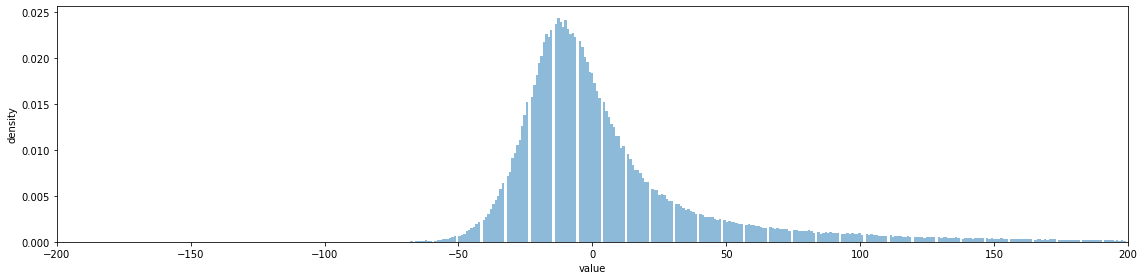

In [65]:
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x="arr_delay", ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density", data=df)
ax.set_xlim(-200, 200)

ax.set_ylabel("density")
ax.set_xlabel("value")

plt.tight_layout()
plt.show()

Let's test the normality of the distribution using a D’Agostino and Pearson normality test (the hypothesis null is that the distribution is normal)

In [95]:
x = df.dropna()["arr_delay"].values
print("x", x)
k2, p = stats.normaltest(x, nan_policy='omit')
print(f"k2={k2}, p={p}")

x [ 11.  20.  33. ... -16.   1. -25.]
k2=271017.5230787647, p=0.0


---

How to compute a **confidence interval**?

1. Identify the sample mean, $\bar {x}$.


2. Identify whether the population standard deviation is known, {\displaystyle \sigma }\sigma , or is unknown and is estimated by the sample standard deviation {\displaystyle s}s.

    * If the population standard deviation is known then: 
    $$z^{*}=\Phi ^{-1}\left(1 - \frac{\alpha }{2}\right)$$

    * If the population standard deviation is unknown then the Student's t distribution is used as the critical value. This value is dependent on the confidence level (C) for the test and degrees of freedom ($n − 1$). $$t^{*}= F_t^{-1}\left(1 - \frac {\alpha }{2}; \nu \right)$$
    where $F_t^{-1}$ is the inverse of the cumulative function of $t$ and $\nu$ is the number of degrees of freedom.


3. Plug the found values into the appropriate equations:

    * For a known standard deviation: 
$$\displaystyle \left({\bar {x}}-z^{*}{\sigma  \over {\sqrt {n}}},{\bar {x}}+z^{*}{\sigma  \over {\sqrt {n}}}\right)$$

    * For an unknown standard deviation: 
$$\left({\bar {x}}-t^{*}{s \over {\sqrt {n}}},{\bar {x}}+t^{*}{s \over {\sqrt {n}}}\right)$$

In [105]:
alpha = 0.05
half = 1 - alpha/2
z_star = stats.norm.ppf(half) # Percent point function: inverse of the CDF
print("level of confidence plus one half", half)
print(f"z_star {z_star}")
print(f"z_star rounded {z_star:.2f}")

level of confidence plus one half 0.975
z_star 1.959963984540054
z_star rounded 1.96


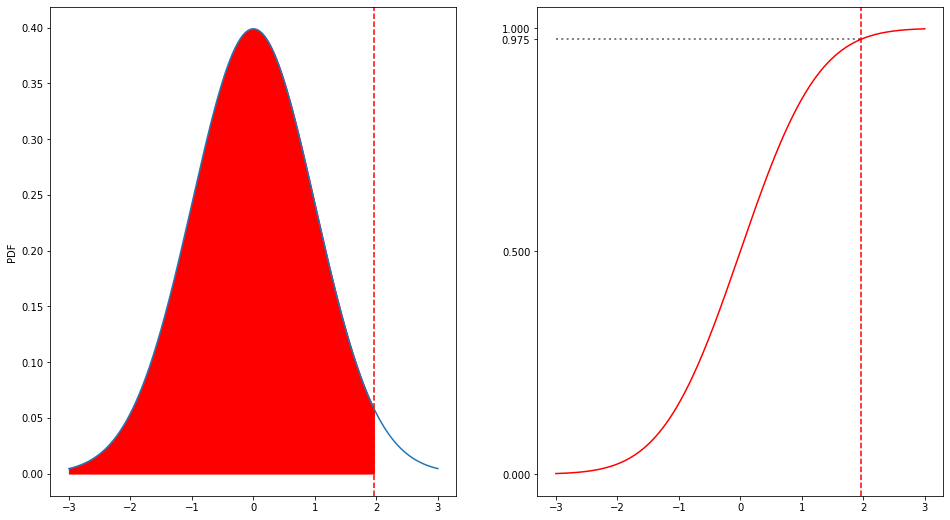

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))

mu = 0
sigma = 1

z_min, z_max = -3, 3
z = np.linspace(z_min, z_max, 1000) 

y = stats.norm.pdf(z)
ax1.plot(z, y)

ax1.axvline(z_star, ls='--', color="red")

# Fill
x_f = np.linspace(z_min, z_star, 1000)
y_f = stats.norm.pdf(x_f)
ax1.fill_between(x_f, 0, y_f, color="red")

ax1.set_ylabel("PDF")

y2 = stats.norm.cdf(z, loc=mu, scale=sigma)

ax2.plot(z, y2, color="red")
ax2.axvline(z_star, ls='--', color="red")
ax2.plot((z_min,z_star), (1-alpha/2, 1-alpha/2), color="black", alpha=0.5, lw=2, ls=":")
ax2.set_yticks([0, 0.5, 1-alpha/2, 1])

plt.show()

---

For our 'delay of arrival' problem, as we don't know the standard deviation of our sample, we shall use:

$$\left({\bar {x}}-t^{*}{s \over {\sqrt {n}}},{\bar {x}}+t^{*}{s \over {\sqrt {n}}}\right)$$

In [98]:
alpha = 0.05

n = len(x)
m, se = np.mean(x), stats.sem(x)
out_cdf = 1 - alpha / 2.
dof = n-1
c = se * stats.t.ppf(out_cdf, dof)  # Percent point function: inverse of the CDF

ic = m-c, m+c
print("IC", ic)

IC (6.742477598995392, 7.048275915634387)


# 7. External validity: The todo-NOT list<a id="S7"></a>
<a href="#Course-Overview">Course Overview</a>

* Do **not** think that a **significant** result means that you're sure that there is a **causal** relationship (remember the <a href="http://www.tylervigen.com/spurious-correlations">spurious correlations</a>)

<img src="img/sun.jpeg" width="500">

* Do **not mutitply** the post hoc **analysis** until you get something **significant**

<img src="img/Eureka-1.jpg" width="300">

* Do not think that a non-significant result means that there is no effect: "**Absence of evidence is not evidence of absence**"

<img src="img/comics_sign.jpeg" width="500">

## Conclusive Remarks and a Few Takeaways
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>
    <ul>
        <li> Understand what is a inferential test and a <i>p</i> value
        <li> Being able to assess the statistical significance of an experimental result
        <li> Differenciate what is a type-1 and type-2 error
        <li> Understand the condition of application of a test
        <li> Know what are the most classical tests and when to apply them
        <li> Being able to assess the external validy of a study
    </ul>
</div>

## Additional material
<a href="#Course-Overview">Course Overview</a>

In [187]:
# Using 'statsmodels' library which is more 'R' like and more verbose
df = pd.read_csv(os.path.join("data", "rr.csv"))

formula = "Growth ~ Debt"
model =  ols(formula, df).fit()  #sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           4.72e-12
Time:                        21:27:07   Log-Likelihood:                -2930.9
No. Observations:                1175   AIC:                             5866.
Df Residuals:                    1173   BIC:                             5876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2704      0.150     28.558      0.0